## Introduction:

This notebook is devoted to the implemention of a claim management system that helps BNP accelerate its claims managment system and detemine the claims that really need approval .. 

The attributes are labeled with ambiguous columns names .. except the target variable .. 

The "target" column in the train set is the variable to predict. It is equal to 1 for claims suitable for an accelerated approval.

The task is to predict a probability ("PredictedProb") for each claim in the test set.

Dataset link ==> https://www.kaggle.com/c/bnp-paribas-cardif-claims-management/data

In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
df = pd.read_csv('train.csv', header = 0)

In [112]:
df.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [113]:
np.shape(df)

(114321, 133)

The dataset contains data for 113421 users and their corresponding 133 features .. 

In [114]:
df.isnull().any()

ID        False
target    False
v1         True
v2         True
v3         True
v4         True
v5         True
v6         True
v7         True
v8         True
v9         True
v10        True
v11        True
v12        True
v13        True
v14        True
v15        True
v16        True
v17        True
v18        True
v19        True
v20        True
v21        True
v22        True
v23        True
v24       False
v25        True
v26        True
v27        True
v28        True
          ...  
v102       True
v103       True
v104       True
v105       True
v106       True
v107       True
v108       True
v109       True
v110      False
v111       True
v112       True
v113       True
v114       True
v115       True
v116       True
v117       True
v118       True
v119       True
v120       True
v121       True
v122       True
v123       True
v124       True
v125       True
v126       True
v127       True
v128       True
v129      False
v130       True
v131       True
Length: 133, dtype: bool

In [115]:
df.isnull().sum()

ID            0
target        0
v1        49832
v2        49796
v3         3457
v4        49796
v5        48624
v6        49832
v7        49832
v8        48619
v9        49851
v10          84
v11       49836
v12          86
v13       49832
v14           4
v15       49836
v16       49895
v17       49796
v18       49832
v19       49843
v20       49840
v21         611
v22         500
v23       50675
v24           0
v25       48619
v26       49832
v27       49832
v28       49832
          ...  
v102      51316
v103      49832
v104      49832
v105      48658
v106      49796
v107          3
v108      48624
v109      48624
v110          0
v111      49832
v112        382
v113      55304
v114         30
v115      49895
v116      49836
v117      48624
v118      49843
v119      50680
v120      49836
v121      49840
v122      49851
v123      50678
v124      48619
v125         77
v126      49832
v127      49832
v128      48624
v129          0
v130      49843
v131      49895
Length: 133, dtype: int6

In [116]:
df.isnull().sum()/len(df)

ID        0.000000
target    0.000000
v1        0.435895
v2        0.435581
v3        0.030239
v4        0.435581
v5        0.425329
v6        0.435895
v7        0.435895
v8        0.425285
v9        0.436062
v10       0.000735
v11       0.435930
v12       0.000752
v13       0.435895
v14       0.000035
v15       0.435930
v16       0.436446
v17       0.435581
v18       0.435895
v19       0.435992
v20       0.435965
v21       0.005345
v22       0.004374
v23       0.443269
v24       0.000000
v25       0.425285
v26       0.435895
v27       0.435895
v28       0.435895
            ...   
v102      0.448876
v103      0.435895
v104      0.435895
v105      0.425626
v106      0.435581
v107      0.000026
v108      0.425329
v109      0.425329
v110      0.000000
v111      0.435895
v112      0.003341
v113      0.483761
v114      0.000262
v115      0.436446
v116      0.435930
v117      0.425329
v118      0.435992
v119      0.443313
v120      0.435930
v121      0.435965
v122      0.436062
v123      0.

In [117]:
df.isnull().sum().any() >= 113000

False

there are many attributes contain null values however, their ration don't reach i.e. 95% of the columns data .. 

it seems they even don't reach half of them !

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Columns: 133 entries, ID to v131
dtypes: float64(108), int64(6), object(19)
memory usage: 116.0+ MB


there are 108 float64 variables, 6 int64, and 19 categorical variables .. 

mmmm there are 19 categorical variables in our dataset .. 

let's extract all of them once in a seperate dataframe for better exploration ..  

In [119]:
int_var = df.select_dtypes(include=['int'])
int_var.head()

,ID,target,v38,v62,v72,v129
0,3,1,0,1,1,0
1,4,1,0,2,2,0
2,5,1,0,1,3,2
3,6,1,0,1,2,1
4,8,1,0,1,1,0


mmm I think ID is irrlevent ! .. 
and target is the main .. target variable !! .. 

we need to explor it first .. then explore the other 4 variables .. 

In [120]:
cat_var = df.select_dtypes(include=['object'])
cat_var.head()

,v3,v22,v24,v30,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
0,C,XDX,C,C,A,C,G,DI,C,F,B,D,E,A,E,B,O,NaN,AU
1,C,GUV,C,C,A,E,G,DY,A,F,B,D,D,B,B,A,U,G,AF
2,C,FQ,E,NaN,A,C,F,AS,A,B,B,B,E,G,C,B,S,NaN,AE
3,C,ACUE,D,C,B,C,H,BW,A,F,B,D,B,B,B,B,J,NaN,CJ
4,C,HIT,E,NaN,A,I,H,NaN,C,F,B,D,C,G,C,A,T,G,Z


In [121]:
float_var = df.select_dtypes(include=['float'])
float_var.head()

,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,...,v120,v121,v122,v123,v124,v126,v127,v128,v130,v131
0,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,...,1.059603,0.803572,8.000000,1.989780,0.035754,1.804126,3.113719,2.024285,0.636365,2.857144
1,NaN,NaN,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,NaN,...,NaN,NaN,NaN,NaN,0.598896,NaN,NaN,1.957825,NaN,NaN
2,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,...,2.138728,2.238806,9.333333,2.477596,0.013452,1.773709,3.922193,1.120468,0.883118,1.176472
3,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,...,1.166281,1.956521,7.018256,1.812795,0.002267,1.415230,2.954381,1.990847,1.677108,1.034483
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.050328,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning:

### int variables:

#### 1. target:

In [122]:
df.target.isnull().any().any()

False

Great ! .. 
target variable has not got null values ! ..

let's explore it !

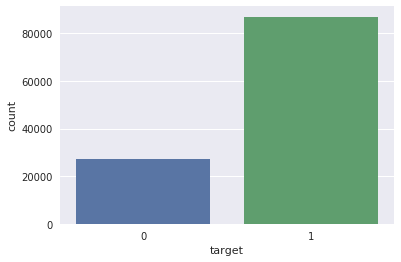

In [123]:
sns.countplot(x="target", data=df)

The majority of the target variables are 1s ! ..

which means, claims suitable for an accelerated approval..

detemining the cases that really need approval will need a deeper look to their records ! .. 

hence, let's explore the rest of the variables !

### 2. the other int variables:

In [124]:
int_var.describe()

,ID,target,v38,v62,v72,v129
count,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000,114321.000000
mean,114228.928228,0.761199,0.090928,1.030694,1.431767,0.310144
std,65934.487362,0.426353,0.583478,0.696244,0.922267,0.693262
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57280.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,114189.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,171206.000000,1.000000,0.000000,1.000000,2.000000,0.000000
max,228713.000000,1.000000,12.000000,7.000000,12.000000,11.000000


mmm in fact .. these variables are not int .. but disceret variables .. 

hence, their null values will be replaced by the mode value !

In [128]:
int_var.v38.fillna(int_var.v38.mode()[0], inplace=True)
int_var.v62.fillna(int_var.v62.mode()[0], inplace=True)
int_var.v72.fillna(int_var.v72.mode()[0], inplace=True)
int_var.v129.fillna(int_var.v129.mode()[0], inplace=True)

In [134]:
int_var.v38.value_counts()

0     109724
1       2143
2       1198
3        534
4        256
5        153
7         85
6         69
8         61
10        47
9         38
12        13
Name: v38, dtype: int64

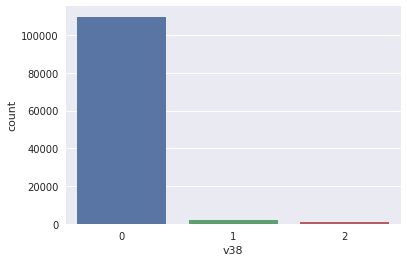

In [133]:
sns.countplot(x="v38", data=int_var, order=int_var.v38.value_counts().iloc[:3].index)

mmm the majority of this column goes to (0) value !

In [135]:
int_var.v62.value_counts()

1    73830
0    20630
2    16413
3     2826
4      471
5       99
6       47
7        5
Name: v62, dtype: int64

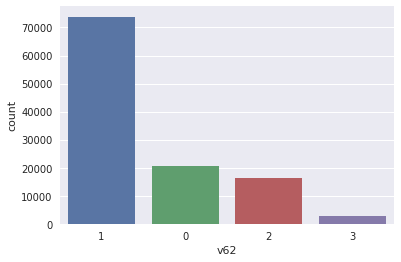

In [137]:
sns.countplot(x="v62", data=int_var, order=int_var.v62.value_counts().iloc[:4].index)

while in v62 .. the majority goes to the value of 1 

In [139]:
int_var.v72.value_counts()

1     75767
2     24341
3      7269
0      3355
4      2221
5       685
6       288
7       131
8        89
9        71
10       56
12       32
11       16
Name: v72, dtype: int64

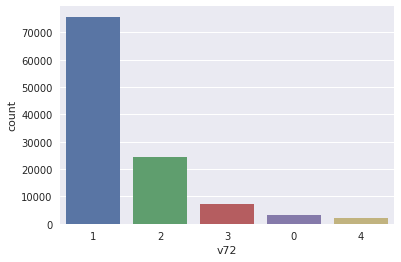

In [140]:
sns.countplot(x="v72", data=int_var, order=int_var.v72.value_counts().iloc[:5].index)

Here as well, the majority goes to the value of 1 .. 

In [141]:
int_var.v129.value_counts()

0     90247
1     15313
2      6889
3      1373
4       357
5        83
6        45
11        8
8         3
7         3
Name: v129, dtype: int64

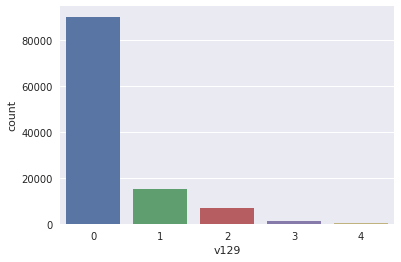

In [142]:
sns.countplot(x="v129", data=int_var, order=int_var.v129.value_counts().iloc[:5].index)

:D  .. back to the majority of zero value ..

### Conclusion:

In the dataset .. we have 5 main discrete class variables .. 

one target variable .. and 4 other variables (two of them have value of zero as a majority and the other two have value of 1) .. 

target variable doesn't contain any null values ! 

## Categorical variables:

In [143]:
np.shape(cat_var)

(114321, 19)

we have 19 categorical variables .. 

let's explore them deeply .. 

### 2. V3:

In [68]:
df.v3.isnull().any().any()

True

In [69]:
df.v3.isnull().sum()

3457

it contains empty cells .. let's fill them with the mode ! 

In [70]:
df['v3'].fillna(df['v3'].mode()[0], inplace=True)

In [71]:
df.v3.isnull().sum()

0

done ! ..

let's plot it !

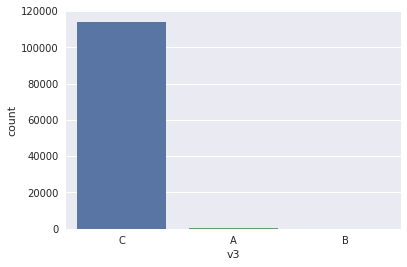

In [72]:
sns.countplot(x="v3", data=df)

In [73]:
df.v3.value_counts()

C    114041
A       227
B        53
Name: v3, dtype: int64

The majority of the data has value of (C) in the variable .. especially after filling the NAs with the mode (which is expected to be C) !

### 3. v125:

In [74]:
df.v125.isnull().any().any()

True

In [75]:
df.v125.isnull().sum()

77

In [76]:
df['v125'].fillna(df['v125'].mode()[0], inplace=True)

In [77]:
df.v125.value_counts()

BM    5836
AK    5337
BJ    4465
CG    3826
AP    3410
BY    3311
V     3234
H     3212
K     2835
G     2594
E     2521
L     2502
BW    2478
BD    2452
AZ    2416
B     2374
AR    2229
CD    2059
AC    1945
Z     1595
AN    1539
A     1528
CA    1523
BK    1477
P     1463
CJ    1446
BU    1369
BX    1297
R     1217
BL    1214
      ... 
AO     644
BR     642
M      636
CK     623
T      615
AA     542
AV     538
C      514
BF     511
BP     504
AD     486
AQ     469
CL     461
AM     444
AS     427
BT     407
CI     397
BC     394
BG     355
BA     349
AH     343
I      253
O      248
BS     240
F      221
AB     189
AJ      82
BB      68
AX      13
BZ       3
Name: v125, Length: 90, dtype: int64

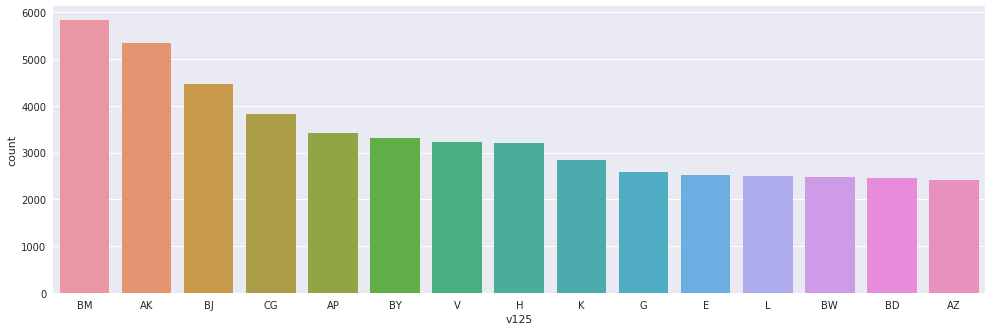

In [78]:
sns.set(rc={'figure.figsize':(16.7,5.27)})
sns.countplot(x="v125", data=df, order=df.v125.value_counts().iloc[:15].index)

The highest value in v125 variable is BM (appeared 5836 times) while the lowest is BZ .. 